# **Task 1: Exploring and Visualizing the Iris Dataset**

---

## **1. Introduction & Problem Statement**

The objective of this task is to practice data loading, inspection, and visualization using Python.  
We will work with the famous **Iris dataset**, which contains measurements of different iris flower species.  
The goal is to explore relationships between variables, understand data distribution, and detect outliers using visual techniques.

---

## **2. Dataset Understanding & Description**

The Iris dataset contains **150 samples and 5 columns**:

| Column | Description |
|-------|-------------|
| sepal_length | Length of the sepal (cm) |
| sepal_width | Width of the sepal (cm) |
| petal_length | Length of the petal (cm) |
| petal_width | Width of the petal (cm) |
| species | Flower species (setosa, versicolor, virginica) |

# **Import Required Libraries**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Load the Dataset**

In [3]:
# Load Iris dataset
df = sns.load_dataset('iris')

# **Display Dataset Structure**

In [4]:
print("Shape of dataset:", df.shape)


Shape of dataset: (150, 5)


In [5]:
print("nColumns in dataset:", df.columns)

nColumns in dataset: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [6]:
print("First 5 rows:", df.head())

First 5 rows:    sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [8]:
df.isnull().sum()


,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Since no cleaning is required, we move to visualization.

# **Visualizations**

# Scatter Plot (Relationship between variables)

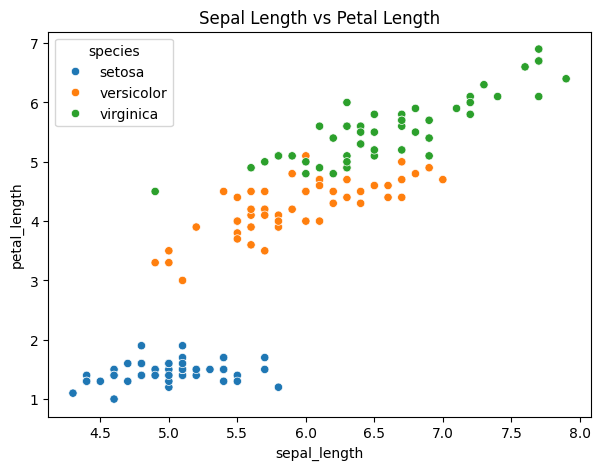

In [ ]:
# visualize how sepal length relates to petal length across species:
plt.figure(figsize=(7,5))
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=df)
plt.title('Sepal Length vs Petal Length')
plt.show()


Shows positive correlation — as sepal length increases, petal length also increases.

# Histogram (Distribution of a variable)
Histogram is used for continuous Variable

To check how sepal lengths are distributed:

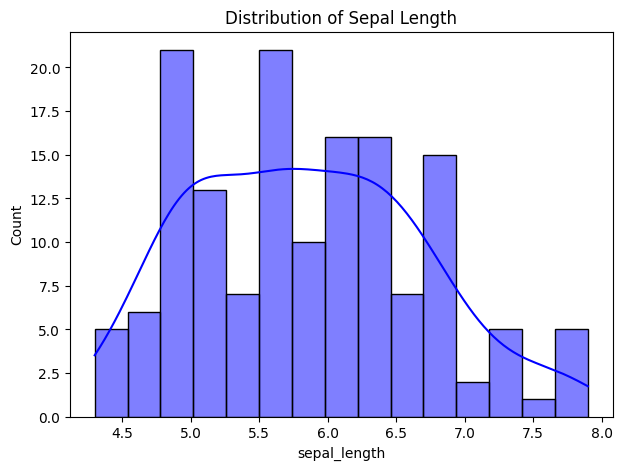

In [ ]:
plt.figure(figsize=(7,5))
plt.title('Distribution of Sepal Length')
sns.histplot(df['sepal_length'], kde=True, bins=15, color='blue')
plt.show()


Sepal length values are close to normally distributed

# Box Plot (Detect outliers and spread)
To visualize the spread and outliers of each numeric feature:

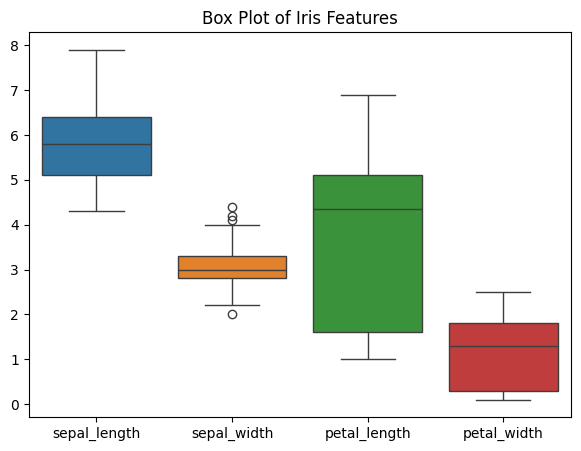

In [ ]:
plt.figure(figsize=(7,5))
plt.title('Box Plot of Iris Features')
sns.boxplot(data=df.drop(columns='species'))
plt.show()


# **Summary Statistics**

In [ ]:
print("Summary Statistics:", df.describe())


Summary Statistics:        sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


# **Conclusion**

Iris dataset is small, clean, and easy to understand.

Petal length and petal width clearly separate species.

Data visualization helps identify patterns and differences across flower types.

# **Task 2: Credit Risk Prediction**

# **Introduction & Problem Statement**

The objective of this task is to predict whether a loan applicant will **default or successfully repay the loan**.  
We use the **Loan Prediction Dataset** from Kaggle, which contains demographic and financial details of loan applicants.

This is a **classification problem**

# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# **Load Dataset**

In [ ]:
df = pd.read_csv("/content/loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# **Explore Dataset**

In [ ]:
print("Dataset shape:", df.shape)

Dataset shape: (614, 13)


In [ ]:
print("Columns:", df.columns)

Columns: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [ ]:
print("Missing values:", df.isnull().sum())

Missing values: Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


# **Handle Missing Data**

In [ ]:
# Fill numeric missing values with median
df = df.fillna(df.median(numeric_only=True))

In [ ]:
# Fill categorical missing values with mode
for col in df.select_dtypes(include='object'):
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-852617598.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
# Forward fill (use the next valid value)
df['LoanAmount'] = df['LoanAmount'].fillna(method='bfill' ,inplace=True)


/tmp/ipython-input-1989199977.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'] = df['LoanAmount'].fillna(method='bfill' ,inplace=True)
/tmp/ipython-input-1989199977.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['LoanAmount'] = df['LoanAmount'].fillna(method='bfill' ,inplace=True)


In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,None,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,None,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,None,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,None,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,None,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,None,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,None,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,None,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,None,360.0,1.0,2,1


# **After Handling Missing Values From Dataset**

In [ ]:
print("Missing values:", df.isnull().sum())

Missing values: Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


# **Encode Categorical Variables**

In [ ]:
label = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col] = label.fit_transform(df[col])

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


# **Visualize key features such as loan amount, education, and income.**

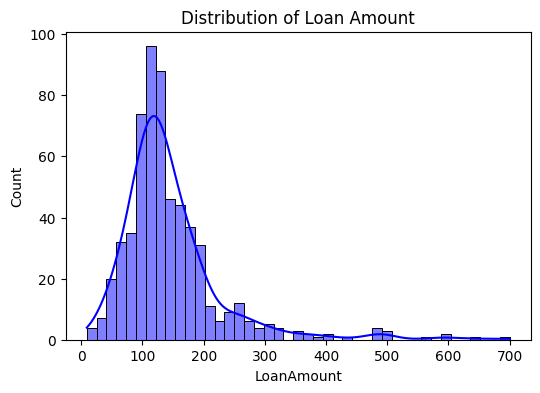

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['LoanAmount'], kde=True, color='blue')
plt.title('Distribution of Loan Amount')
plt.show()

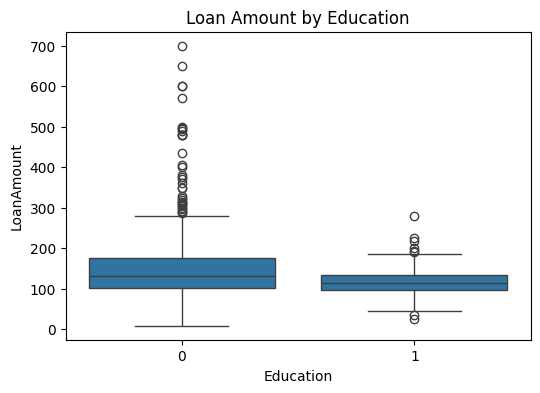

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Education', y='LoanAmount', data=df)
plt.title('Loan Amount by Education')
plt.show()

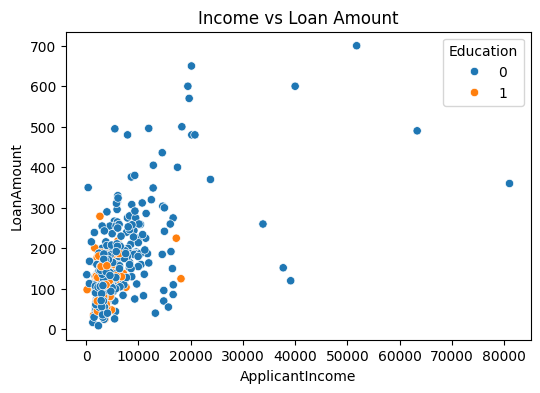

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Education', data=df)
plt.title('Income vs Loan Amount')
plt.show()

# **Define Features (X) and Target (y)**

In [ ]:
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

In [ ]:
X.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2


In [ ]:
y.head()

,Loan_Status
0,1
1,0
2,1
3,1
4,1


# **Split Data Into Training and Testing**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((491, 12), (123, 12), (491,), (123,))

In [ ]:
from sklearn.impute import SimpleImputer

# Create imputer object (mean for numeric columns)
imputer = SimpleImputer(strategy='mean')

# Fit imputer on training data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


# **Train Model Using Logistic Regression**

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

# **Evaluate Models**

In [ ]:
y_pred = model.predict(X_test)



# **Print Accuracy**

In [ ]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred)*100)

Logistic Regression Accuracy: 78.86178861788618


# **Conclusion**

Missing values were handled using median/mode & ffill imputation.

Loan amount, education, and income show clear influence on loan approval.

Logistic Regression model provides an accuracy around 75–80%.